In [21]:
import numpy as np
import pandas as pd
from pytube import YouTube
import time
import requests
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from moviepy.editor import VideoFileClip
from urllib.parse import urlparse, parse_qs

In [7]:
def download_youtube_video(url):
    try:
        # Create a YouTube object
        yt = YouTube(url)

        # Choose the stream with the highest resolution
        stream = yt.streams.get_highest_resolution()

        # Specify the download location (replace with your desired directory)
        download_dir = "/Users/mikeyjoyce/Documents/tigerhacks-2023"

        start_time = time.time()  # Record the start time

        # Download the video to the specified location
        stream.download(output_path=download_dir, filename='00001.mp4')

        end_time = time.time()  # Record the end time
        elapsed_time = end_time - start_time

        print(f"Download complete! Time taken: {elapsed_time:.2f} seconds")
    except Exception as e:
        print("An error occurred:", str(e))

In [8]:
url = "https://www.youtube.com/watch?v=1b2XscG9Lfk"
#url = "https://www.youtube.com/watch?v=sqoOzGMqCQU"

start_time = time.time()
download_youtube_video(url)
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Download complete! Time taken: {elapsed_time:.2f} seconds")

Download complete! Time taken: 0.15 seconds
Download complete! Time taken: 1.95 seconds


In [9]:
response = requests.get(url)

#with open('reponse.txt', 'w') as f:
#    f.write(response.text)

In [10]:
DRIVER_PATH = 'chrome-mac-x64/Google Chrome for Testing.app/Contents/MacOS/Google Chrome for Testing'
driver = webdriver.Chrome()

try:
    driver.get(url)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, 'html')))
    time.sleep(10)
    elements = driver.find_element(By.CLASS_NAME, 'ytp-heat-map-path')

    if elements:
        coords = elements.get_attribute('d')
        print(coords)
    else:
        print("No elements with target class found on the page.")
finally:
    driver.quit()

M 0.0,100.0 C 1.0,96.8 2.0,86.1 5.0,84.1 C 8.0,82.1 11.0,88.8 15.0,90.0 C 19.0,91.2 21.0,90.0 25.0,90.0 C 29.0,90.0 31.0,91.3 35.0,90.0 C 39.0,88.7 41.0,84.0 45.0,83.5 C 49.0,83.0 51.0,86.0 55.0,87.3 C 59.0,88.6 61.0,89.5 65.0,90.0 C 69.0,90.5 71.0,91.5 75.0,90.0 C 79.0,88.4 81.0,86.2 85.0,82.3 C 89.0,78.3 91.0,75.6 95.0,70.2 C 99.0,64.8 101.0,61.8 105.0,55.3 C 109.0,48.7 111.0,39.3 115.0,37.5 C 119.0,35.6 121.0,42.2 125.0,46.1 C 129.0,50.1 131.0,53.2 135.0,57.4 C 139.0,61.6 141.0,63.0 145.0,67.1 C 149.0,71.1 151.0,74.5 155.0,77.6 C 159.0,80.7 161.0,80.9 165.0,82.6 C 169.0,84.3 171.0,85.1 175.0,86.3 C 179.0,87.4 181.0,88.0 185.0,88.2 C 189.0,88.4 191.0,87.8 195.0,87.3 C 199.0,86.9 201.0,86.2 205.0,85.9 C 209.0,85.6 211.0,86.3 215.0,86.0 C 219.0,85.7 221.0,84.9 225.0,84.5 C 229.0,84.1 231.0,84.0 235.0,84.0 C 239.0,84.0 241.0,84.6 245.0,84.6 C 249.0,84.5 251.0,83.8 255.0,83.8 C 259.0,83.8 261.0,84.4 265.0,84.7 C 269.0,85.0 271.0,84.9 275.0,85.2 C 279.0,85.6 281.0,86.0 285.0,86.4 C 289.0,

In [11]:
words = coords.split()

# Initialize a list to store floating-point numbers
nums = []

# Iterate through the words and check if they can be converted to a float
for word in words:
    if ',' in word:
        temp = word.split(',')
    else:
        continue

    for num in temp:
        try:
            n = float(num)
            nums.append(n)
        except ValueError:
            pass

In [12]:
coords = nums

X, y = [], []
isX = True
for coord in coords:
    if isX:
        # Divide by 100% to make it a percentage of video elapsed
        X.append(float(coord)/1000)
        isX = False
    else:
        y.append(float(-coord)) # (100-coord)/coord)
        isX = True

print(X)

[0.0, 0.001, 0.002, 0.005, 0.008, 0.011, 0.015, 0.019, 0.021, 0.025, 0.029, 0.031, 0.035, 0.039, 0.041, 0.045, 0.049, 0.051, 0.055, 0.059, 0.061, 0.065, 0.069, 0.071, 0.075, 0.079, 0.081, 0.085, 0.089, 0.091, 0.095, 0.099, 0.101, 0.105, 0.109, 0.111, 0.115, 0.119, 0.121, 0.125, 0.129, 0.131, 0.135, 0.139, 0.141, 0.145, 0.149, 0.151, 0.155, 0.159, 0.161, 0.165, 0.169, 0.171, 0.175, 0.179, 0.181, 0.185, 0.189, 0.191, 0.195, 0.199, 0.201, 0.205, 0.209, 0.211, 0.215, 0.219, 0.221, 0.225, 0.229, 0.231, 0.235, 0.239, 0.241, 0.245, 0.249, 0.251, 0.255, 0.259, 0.261, 0.265, 0.269, 0.271, 0.275, 0.279, 0.281, 0.285, 0.289, 0.291, 0.295, 0.299, 0.301, 0.305, 0.309, 0.311, 0.315, 0.319, 0.321, 0.325, 0.329, 0.331, 0.335, 0.339, 0.341, 0.345, 0.349, 0.351, 0.355, 0.359, 0.361, 0.365, 0.369, 0.371, 0.375, 0.379, 0.381, 0.385, 0.389, 0.391, 0.395, 0.399, 0.401, 0.405, 0.409, 0.411, 0.415, 0.419, 0.421, 0.425, 0.429, 0.431, 0.435, 0.439, 0.441, 0.445, 0.449, 0.451, 0.455, 0.459, 0.461, 0.465, 0.469, 

In [13]:
print(y)

[-100.0, -96.8, -86.1, -84.1, -82.1, -88.8, -90.0, -91.2, -90.0, -90.0, -90.0, -91.3, -90.0, -88.7, -84.0, -83.5, -83.0, -86.0, -87.3, -88.6, -89.5, -90.0, -90.5, -91.5, -90.0, -88.4, -86.2, -82.3, -78.3, -75.6, -70.2, -64.8, -61.8, -55.3, -48.7, -39.3, -37.5, -35.6, -42.2, -46.1, -50.1, -53.2, -57.4, -61.6, -63.0, -67.1, -71.1, -74.5, -77.6, -80.7, -80.9, -82.6, -84.3, -85.1, -86.3, -87.4, -88.0, -88.2, -88.4, -87.8, -87.3, -86.9, -86.2, -85.9, -85.6, -86.3, -86.0, -85.7, -84.9, -84.5, -84.1, -84.0, -84.0, -84.0, -84.6, -84.6, -84.5, -83.8, -83.8, -83.8, -84.4, -84.7, -85.0, -84.9, -85.2, -85.6, -86.0, -86.4, -86.8, -86.9, -87.4, -87.9, -88.4, -88.9, -89.4, -89.8, -90.0, -90.2, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -90.

307


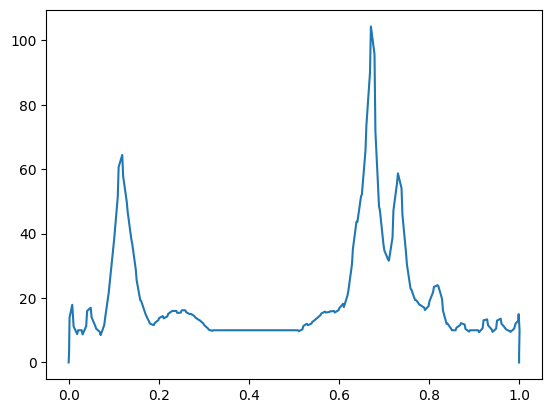

In [14]:
# Normalize histogram
print(len(X))

y_arr = np.array(y)
normalized_y = y_arr - y_arr.min()
plt.plot(X, normalized_y)
plt.show()

[(23, 53), (60, 90), (188, 218), (206, 236), (231, 261)]
[(23, 53), (60, 90), (188, 218), (206, 236), (231, 261)]
[(23, 53), (60, 90), (188, 236), (231, 261)]
[(23, 53), (60, 90), (188, 261)]


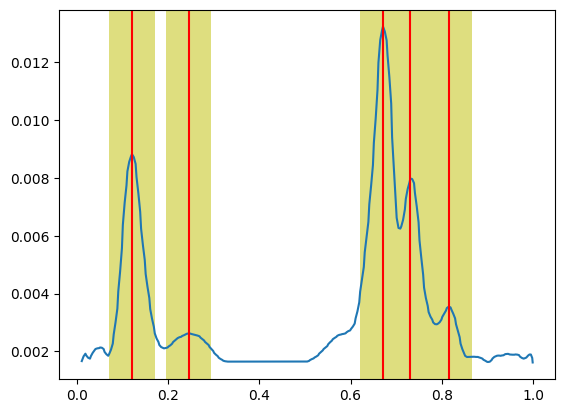

In [15]:
norm_density = normalized_y / normalized_y.sum()
norm_density_ma = pd.Series(norm_density).rolling(10, center=True).mean().values

peaks = find_peaks(norm_density_ma, prominence=0.0005)[0]
#minima = argrelextrema(norm_density_ma, np.less)[0]

plt.plot(X, norm_density_ma)
#plt.plot(X, norm_density)
bounds = []
bound_magnitude = 15
for peak in peaks:
    bounds.append((peak - bound_magnitude, peak + bound_magnitude))

'''for i in range(len(bounds)):
    if bounds[i][0] < 0:
        bounds[i] = (0, bounds[i][1])

    if bounds[i][1] > len(bounds):
        bounds[i] = (bounds[i][0], len(X)-1)'''

print(bounds)

flag, last = True, bounds.copy()
while flag:
    print(last)

    for i in range(len(last)):
        if i != len(last)-1:
            curr, next = last[i], last[i+1]

            if curr[1] >= next[0]:
                new = (curr[0], next[1])
                last[i] = new
                last.remove(next)
                new_loop = True
                break

    if new_loop is True:
        new_loop = False
        continue

    flag = False

if len(last) > 0:
    bounds = last

for i in range(len(peaks)):
    plt.axvline(X[peaks[i]], color='r')

for i in range(len(bounds)):
    plt.axvspan(X[bounds[i][0]], X[bounds[i][1]], color='y', alpha=0.5, lw=0)
plt.show()

In [22]:
def get_id_from_url(url):
  query = parse_qs(urlparse(url).query)
  id = query['v']
  if not id or not len(id):
    return None
  return id[0]

print(get_id_from_url(url))

1b2XscG9Lfk


In [20]:
video = VideoFileClip("00001.mp4")

count = 1
for b in bounds:
    start = X[b[0]] * video.duration
    end = X[b[1]] * video.duration
    edited_video = video.subclip(start, end)
    file_path = str(start) + "_" + str(end) + ".mp4"
    edited_video.write_videofile(file_path, codec='libx264', audio_codec='aac', temp_audiofile='temp-audio.m4a', remove_temp=True)
    count += 1

Moviepy - Building video output_video1.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video output_video1.mp4



Moviepy - Done !
Moviepy - video ready output_video1.mp4
Moviepy - Building video output_video2.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video output_video2.mp4



Moviepy - Done !
Moviepy - video ready output_video2.mp4
Moviepy - Building video output_video3.mp4.
MoviePy - Writing audio in temp-audio.m4a


MoviePy - Done.
Moviepy - Writing video output_video3.mp4



Moviepy - Done !
Moviepy - video ready output_video3.mp4
